In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM

In [2]:
# The aggregated data
data = pd.read_csv("Data/merged_dataset.csv")

In [3]:
emotion_columns = ["I felt bored", "I felt satisfied", "I felt annoyed", "I felt curious"]

In [5]:
# Step 4: Aggregate the Data (Mean per Participant for Each Emotion)
aggregated_per_participant = data.groupby("Participant ID")[emotion_columns].mean()

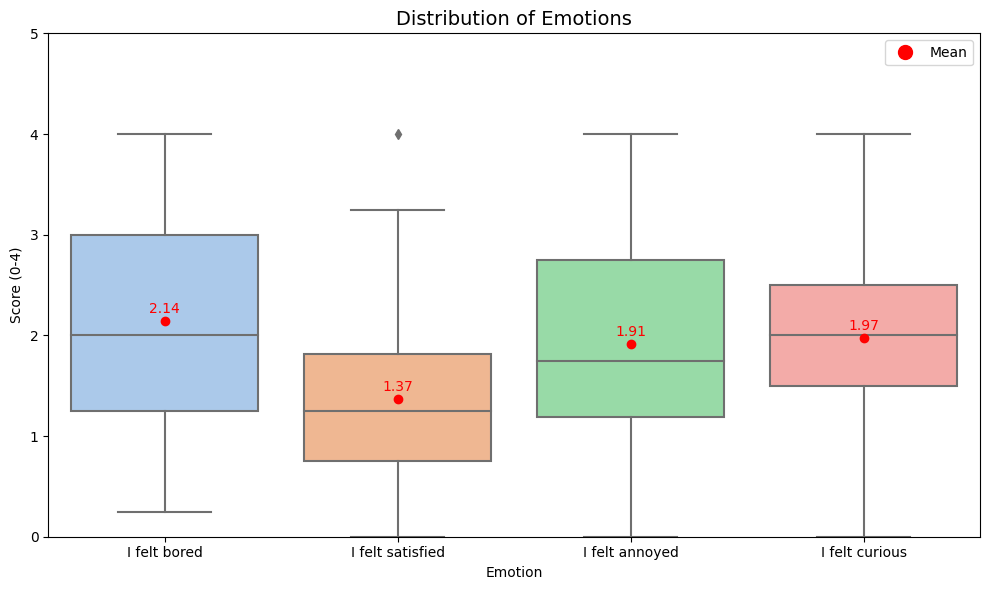

In [16]:
# Recalculate the means to ensure they are properly defined
mean_values_actual = aggregated_melted.groupby("Emotion")["Score"].mean()

# Reorder the mean values to match the boxplot's order
boxplot_order = aggregated_melted["Emotion"].unique()  # Order of emotions in the boxplot
mean_values_corrected = mean_values_actual.reindex(boxplot_order)

# Plot the corrected boxplot with proper mean value alignment
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=aggregated_melted,
    x="Emotion",
    y="Score",
    palette="pastel",
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "red"},
)

# Annotate mean values on the plot with corrected alignment
for i, mean in enumerate(mean_values_corrected):
    plt.text(
        i, mean + 0.05,  # Place slightly above the dot
        f"{mean:.2f}",  # Format mean value to 2 decimal places
        color="red",
        ha="center",  # Center-align horizontally
        va="bottom",  # Vertically align just above the red dot
        fontsize=10,
    )

# Add a legend for the red dot (mean)
red_dot = plt.Line2D([], [], color="red", marker="o", linestyle="None", markersize=10, label="Mean")
plt.legend(handles=[red_dot], loc="upper right")

# Add labels and title
plt.title("Distribution of Emotions", fontsize=14)
plt.xlabel("Emotion")
plt.ylabel("Score (0-4)")
plt.ylim(0, 5)  # Assuming the scale is 0-4
plt.tight_layout()
plt.show()